In [36]:
import numpy as np
from scipy.sparse.linalg import LinearOperator
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
def calc_random_sigma(N, mean=0.5, sd=0.1, seed=0):
    S = np.random.RandomState(seed).normal(mean, sd, (N, N))
    return np.exp(np.negative(S))

def calc_sigma(N):
    h = 1/(N-1)
    x = np.arange(0,(1+h),h)
    y = np.arange(0,(1+h),h)
    sigma = np.zeros((N,N))
    
    for i in range(0,N):
        for j in range(0,N):
            sigma[i][j] = 1 + x[i] * x[i] + y[j] * y[j]
    return sigma


In [38]:
def solve_equation(u_n):
    N = np.int32(np.sqrt(u_n.shape[0]))
    result = np.empty((N*N),dtype='float64')
    sigma = calc_sigma(N)
    h = 1.0/(N - 1)
    
    for i in range(0, N):
        for j in range(0, N):
            if(i == 0 or j == 0 or i == N - 1 or j == N - 1):
                result[i * N + j] = 0
            else:
                u_up = u_n[(i - 1) * N + j]
                u_down = u_n[(i + 1) * N + j]
                u_left = u_n[i * N + (j - 1)]
                u_right = u_n[i * N + (j + 1)]
                u_centre = u_n[i * N + j]
                sigma_up = sigma[i - 1][j]
                sigma_down = sigma[i + 1][j]
                sigma_left = sigma[i][j - 1]
                sigma_right = sigma[i][j + 1]
                sigma_centre = sigma[i][j]
            
                result[i * N + j] = np.negative(
                    (0.5 * (sigma_down + sigma_centre) * (u_down - u_centre) -
                    (0.5 * (sigma_up + sigma_centre) * (u_centre - u_up)) +
                    (0.5 * (sigma_right + sigma_centre) * (u_right - u_centre)) -
                    (0.5 * (sigma_left + sigma_centre) * (u_centre - u_left)))/(h*h))
    return result

In [39]:
N = 10
A = LinearOperator((N*N,N*N),matvec=solve_equation)
f = np.float64(np.ones(N*N))
for i in range(0,N):
    for j in range(0,N):
        if(i == 0 or i == N - 1 or j == 0 or j == N - 1):
            f[i * N + j] = 0

In [40]:
from scipy.sparse.linalg import gmres

In [41]:
residuals = []
def sum_of_res_gmres(rk):
    residuals.append(rk.sum())

In [42]:
u_gmres, info_gmres = gmres(A, f, callback = sum_of_res_gmres)
info_gmres

0

In [43]:
residuals = np.array(residuals)

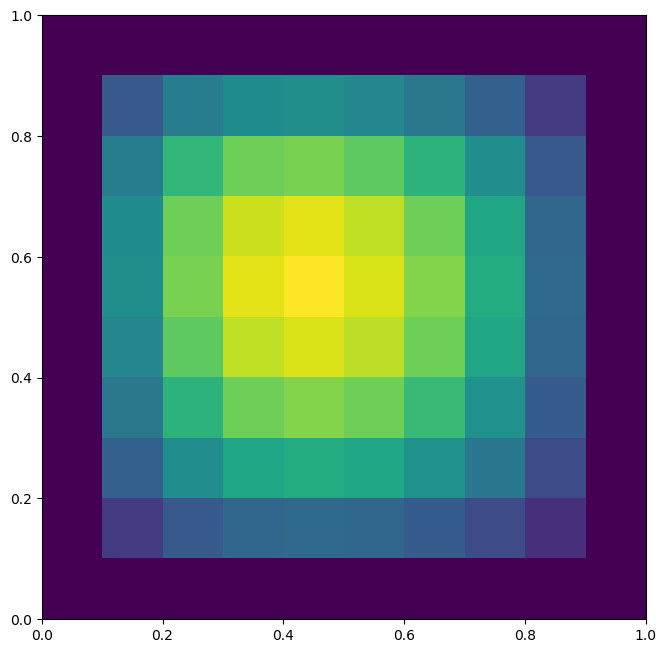

In [44]:
plt.figure(1,dpi=100,figsize=(8,8))
plt.imshow(u_gmres.reshape(N,N),extent=[0,1,0,1])

In [10]:
# plt.figure(1,dpi=100,figsize=(10,5))
# x = np.arange(1,len(residuals)+1)
# plt.plot(x, residuals, "x-", label="gmres")
# plt.ylabel("Sum of residuals")
# plt.xlabel("Number of Iterations")
# plt.xticks(np.arange(0, len(residuals)+1, step=1))
# plt.legend()
# plt.grid(linestyle="--")

# plt.figure(2,dpi=100,figsize=(10,5))
# plt.plot(x, np.log10(residuals), "x-", label="gmres")
# plt.ylabel("log10(Sum of residuals)")
# plt.xlabel("Number of Iterations")
# plt.xticks(np.arange(0, len(residuals)+1, step=1))
# plt.legend()
# plt.grid(linestyle="--")

# plt.show()